In [8]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

import cfl_examples.lesion_mapping.brain_vis as BV

In [9]:
behav_csv = 'PTSD_Data_Share\Behavior_data\PTSD_PerLight.csv'
mri_dir = 'PTSD_Data_Share\MEMRI_data'

In [10]:
# load one image 

img = BU.load_brain(os.path.join(mri_dir, "PTSD_KO_03_BL.nii"))
mri_dims = img.shape

In [ ]:
X, Y = BU.load_data(mri_dir, behav_csv, mri_dims, )

In [12]:
###########FORMAT Y DATA ############ 

Y = pd.read_csv('PTSD_Data_Share\Behavior_data\PTSD_PerLight.csv')

#split ID into one column for each variable 
new = Y["Animal ID"].str.split("_", n=3, expand=True)
Y[ "Genotype"] = new[1]
Y["Animal_Number"] = new[2]
Y["Timepoint"] = new[3]

#drop old ID label 
Y.drop(columns="Animal ID")

#reorder columns 
Y = Y.reindex(columns = ["Genotype", "Animal_Number", "Timepoint", "PerLight"])

#check for NaNs
print(Y.isnull().values.any())

False


In [13]:
Y

,Genotype,Animal_Number,Timepoint,PerLight
0,KO,03,BL,0.676965
1,KO,03,PreF,0.159753
2,KO,03,Fear,0.280408
3,KO,03,D9,0.358919
4,KO,04,BL,0.326555
...,...,...,...,...
74,WT,11,D9,0.403257
75,WT,12,BL,0.350375
76,WT,12,PreF,0.273996
77,WT,12,Fear,0.243884


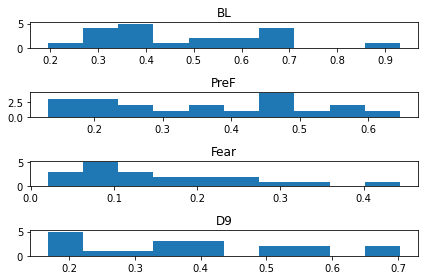

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=1, squeeze=False)

timepoints = Y.Timepoint.unique()
for n, timepoint in enumerate(timepoints):
    ax[n, 0].hist(Y.loc[Y.Timepoint == timepoint]["PerLight"])
    ax[n, 0].title.set_text(timepoint)
plt.tight_layout()
plt.show()

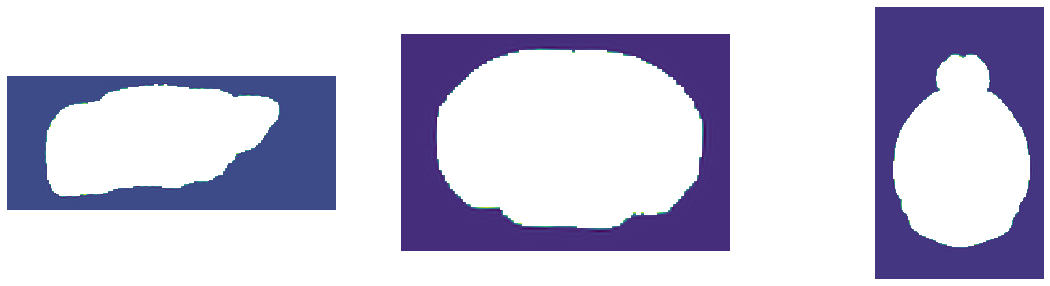

[masked_array(
   data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.

In [22]:
mask = np.ones((np.prod(mri_dims),))
BV.plot_panels(brains, mri_dims, mask)

In [25]:
# specify labels for plot (note the labels below are specifically for RAS orientation)
dir_labels = { 'saggital' :   ['P', 'A', 'D', 'V'],
               'coronal' :    ['L', 'R', 'D', 'V'],
               'horizontal' : ['L', 'R', 'A', 'P']} 
# generate interactive plots

BV.plot_interactive_panels(X[:2], mri_dims, mask, dir_labels, figsize=(8,3), colormap='Blues')


Plotting Pre-enhancement, Post-enhancement, and SPM Results


interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=123, step=5), Outpu…

interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=199, step=5), Outpu…

interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=81, step=5), Output…